## Step 0: Libraries

In [1]:
# %%
# for saving the report to file
from pathlib import Path
import os

# visualize
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# import necessary pandas and pandas extension pandas-profiling
from pandas_profiling import ProfileReport

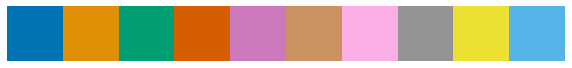

In [2]:
# global parameters
pd.set_option('display.max_columns', 500)
# style for plotting
current_palette = sns.color_palette("colorblind")
sns.palplot(current_palette)
sns.set_palette("colorblind")

## Step 1: Load Dataset and split into training dataset

In [3]:
df_all_train = pd.read_csv("../../../data/train.csv", sep=',')
df_train = df_all_train.sample(frac=0.75, random_state=0, replace=False)

## Step 2: Data Cleaning

In [4]:
# remove unnamed columns which result in error and replace empty strings with NA value
df_train = df_train[df_train.columns.drop(list(df_train.filter(regex='Unnamed')))]

# convert pixels into categorical variable (we want to see those kinds of statistics, average screen size is a bit meaningless)
df_train['pixels_y'] = df_train['pixels_y'].astype(str)
df_train['pixels_x'] = df_train['pixels_x'].astype(str)

df_train = df_train.replace(r'^\s*$', np.nan, regex=True)

## Step 3: Generate profiling report

In [5]:
# generate report
#profile = df_train.profile_report(title="AA4B - Assignment 2 Initial Leptop Dataset Report")
profile = ProfileReport(df_train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# this will save an HTML report in you current working directory
#profile.to_file(output_file=Path("./output/initial_dataset_profiling_report.html"))

In [6]:
profile.to_notebook_iframe()

In [6]:
profile.to_file(output_file="../output/initial_dataset_profiling_report.html")

In [7]:
print(f"Number of columns with missing values: {sum(df_train.isnull().sum() > 0)}")
df_train.isnull().sum() / df_train.shape[0] *100

Number of columns with missing values: 7


id                     0.000000
name                   0.000000
brand                  0.000000
base_name              0.000000
screen_size            0.000000
pixels_x               0.000000
pixels_y               0.000000
screen_surface         2.617801
touchscreen            0.000000
cpu                    0.000000
cpu_details            1.570681
detachable_keyboard    1.047120
discrete_gpu           0.000000
gpu                    0.261780
os                     0.523560
os_details             0.523560
ram                    0.000000
ssd                    0.000000
storage                0.000000
weight                 0.523560
min_price              0.000000
max_price              0.000000
dtype: float64

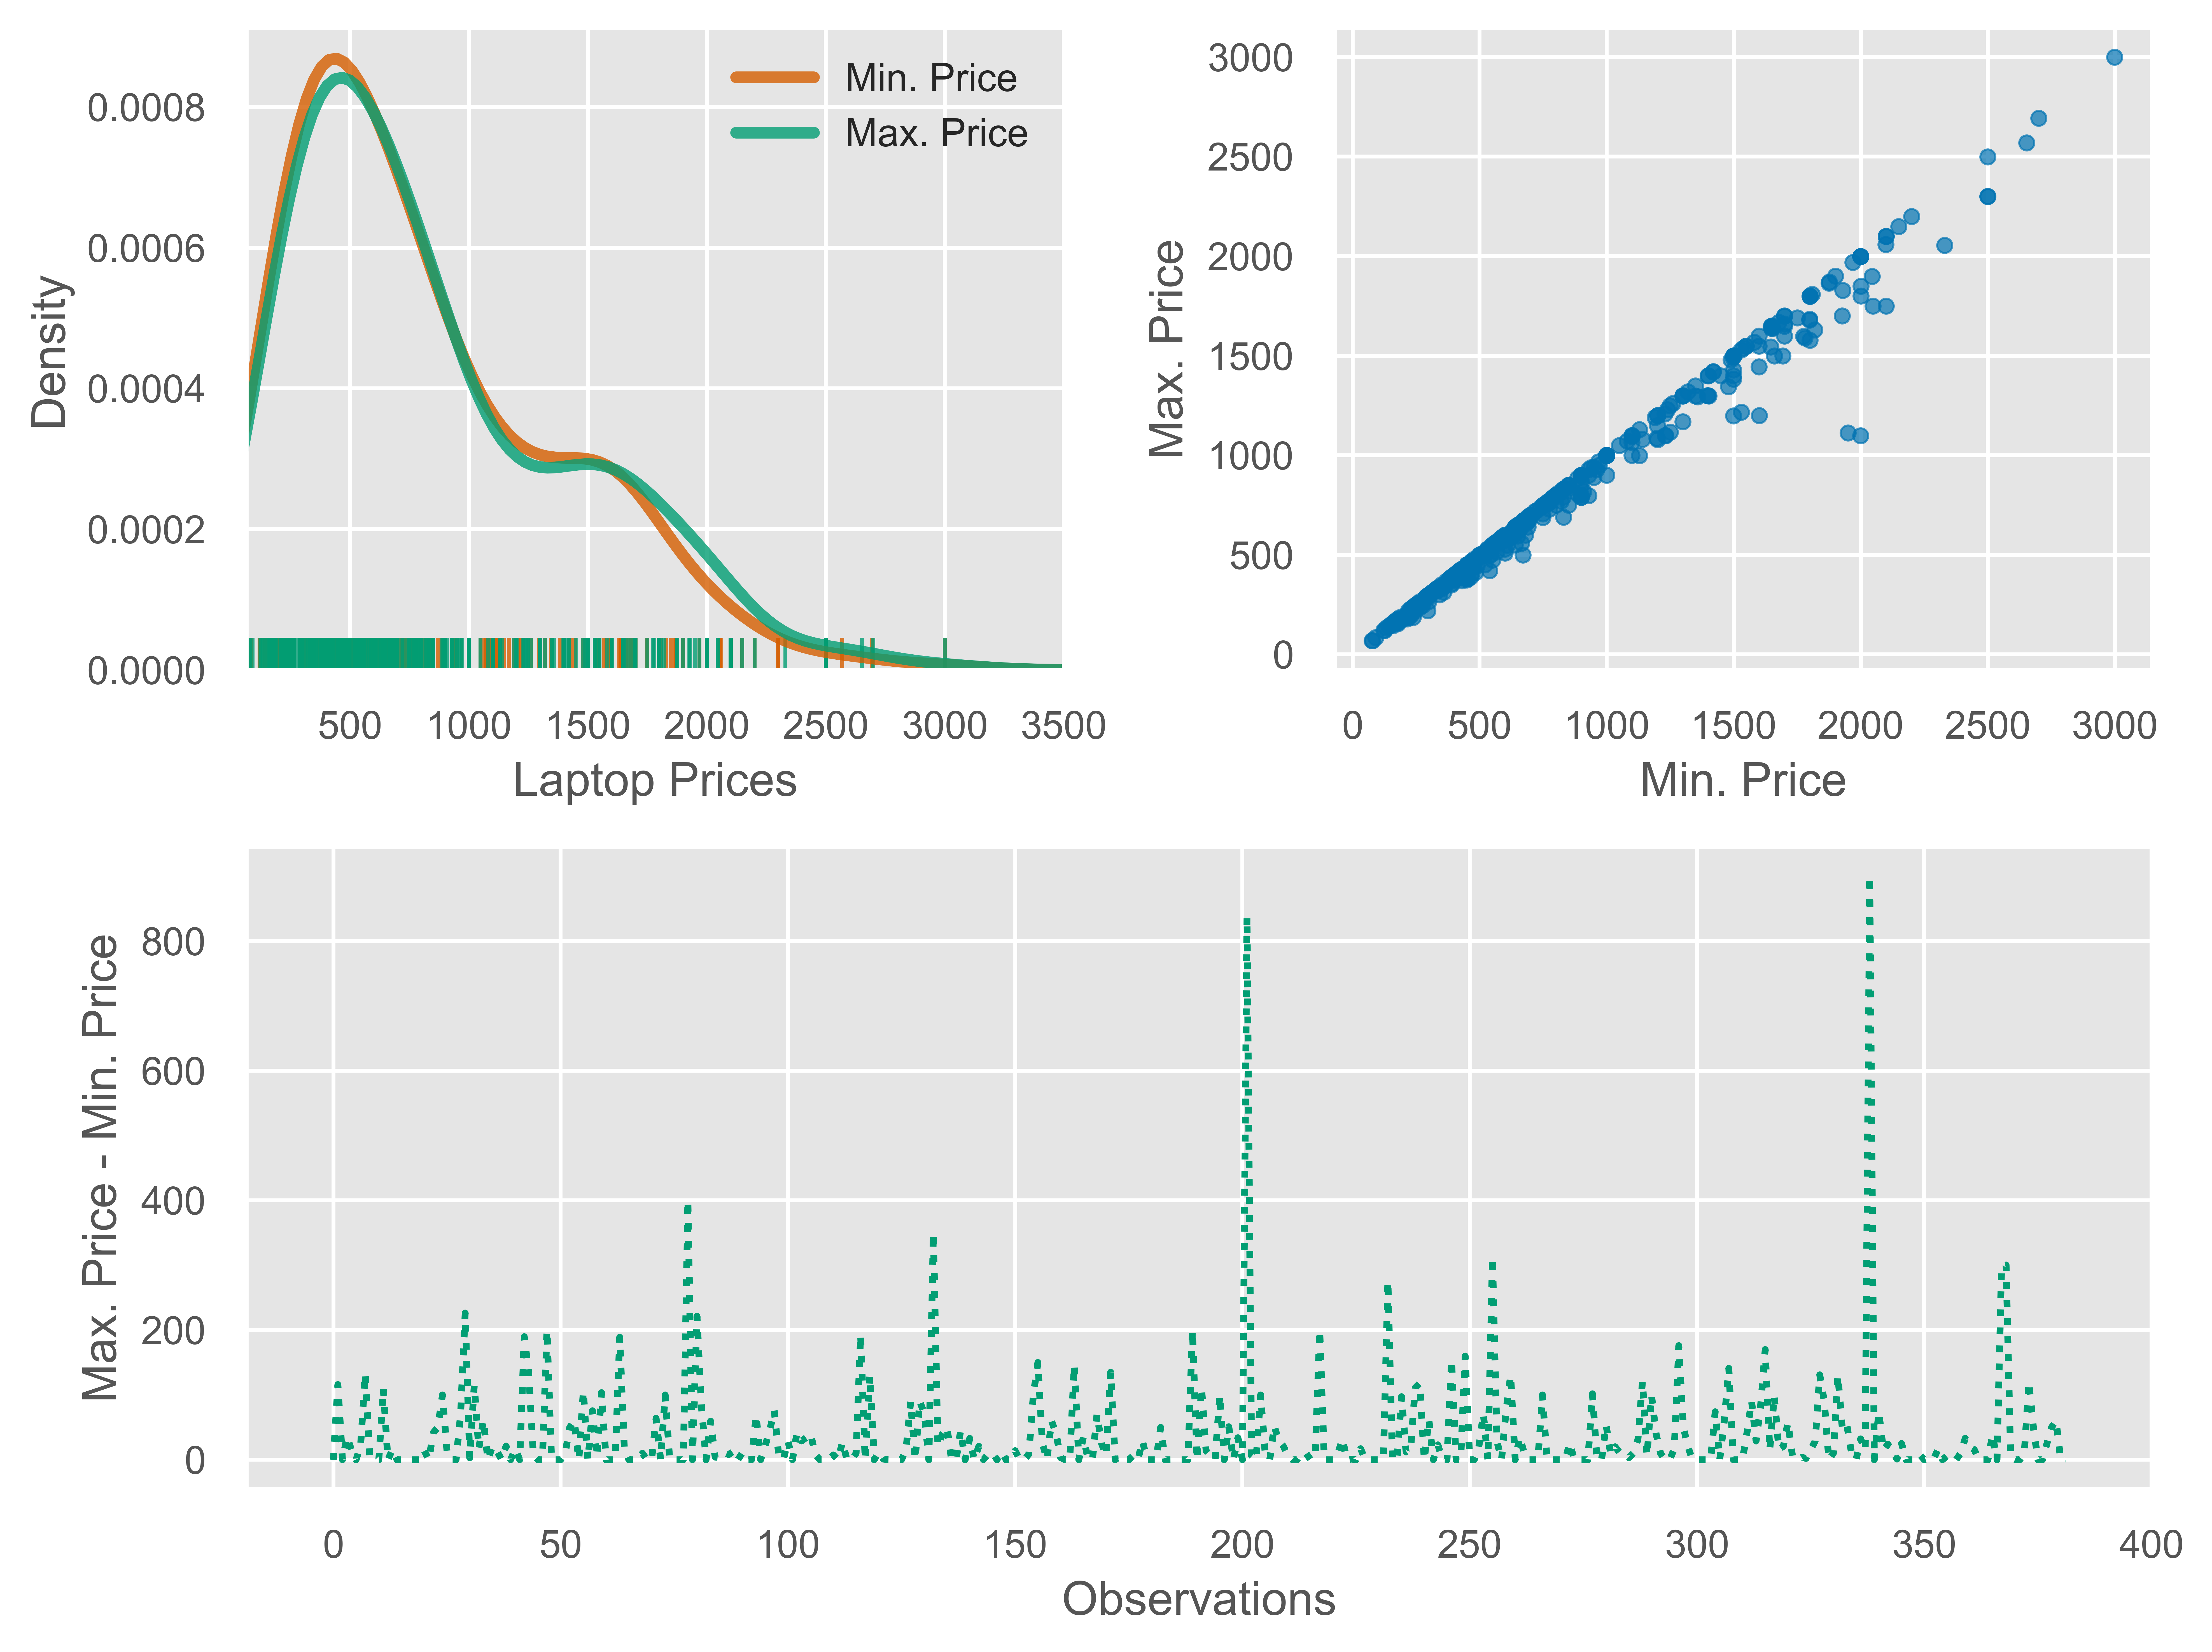

In [17]:
plt.style.use('ggplot')
sns.set_palette("colorblind")
fig = plt.figure(figsize=(8, 6))

# fig 1
plt.subplot(2,2,1)

sns.distplot(df_train['min_price'], hist = False, kde = True, rug=True,
                 kde_kws = {'linewidth': 3,'alpha':0.8, 'color': current_palette[3]},
                 rug_kws={'alpha':0.8, 'color': current_palette[3]},
                 label = 'Min. Price')

sns.distplot(df_train['max_price'], hist = False, kde = True, rug=True,
                 kde_kws = {'linewidth': 3, 'alpha':0.8, "color": current_palette[2]},
                 rug_kws={'alpha':0.8, 'color': current_palette[2]},
                 label = 'Max. Price')

plt.xlim([66,3500])
plt.xlabel("Laptop Prices")
plt.ylabel("Density")
plt.tight_layout()

# fig 2
plt.subplot(2,2,2)
plt.scatter(df_train['max_price'], df_train['min_price'], s=15, alpha=0.7, color=current_palette[0])
plt.xlabel("Min. Price")
plt.ylabel("Max. Price")

# fig 3
plt.subplot(2,2,(3,4))
plt.plot(np.arange(0,df_train.shape[0]), df_train['max_price'] - df_train['min_price'], linestyle=':', color=current_palette[2])
plt.xlabel("Observations")
plt.ylabel("Max. Price - Min. Price")

# tight layout and save
fig.tight_layout()
plt.savefig('../output/figures/eda/fig1.png',dpi=1000)